<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   version          180 non-null    object 
 1   data type        180 non-null    object 
 2   #sample          180 non-null    int64  
 3   n                180 non-null    int64  
 4   time(s)          180 non-null    float64
 5   Normalized_(ns)  180 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 8.6+ KB


          Variable      N       Mean         SD        SE  95% Conf.  \
0  Normalized_(ns)  180.0  6216.5389  3635.0516  270.9407    5681.89   

    Interval  
0  6751.1877  


          N        Mean        SD       SE   95% Conf.    Interval
version                                                           
ver1     30   4030.1667   52.1530   9.5218   4010.6924   4049.6409
ver2     30  11374.7333  299.6832  54.7144  11262.8298  11486.6369
ver3     30   4198.

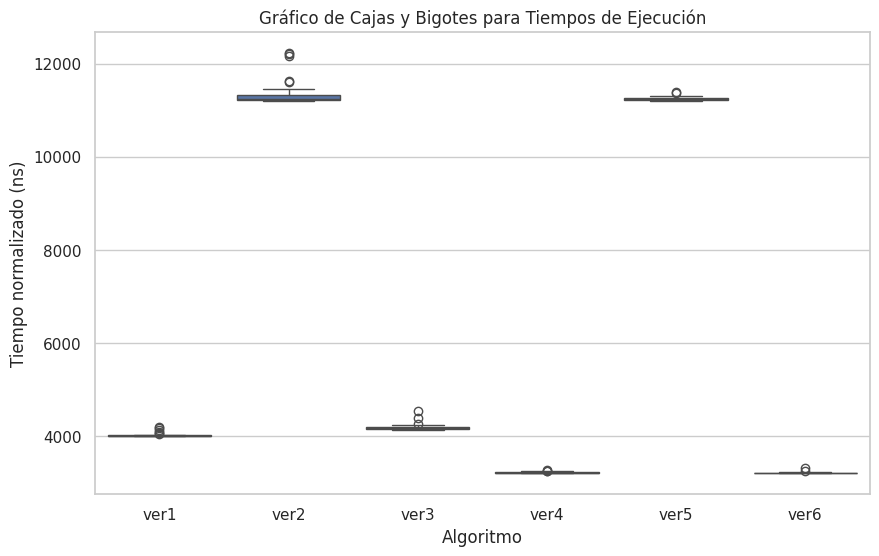

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   version        180 non-null    category
 1   data type      180 non-null    object  
 2   #sample        180 non-null    int64   
 3   n              180 non-null    int64   
 4   time(s)        180 non-null    float64 
 5   Normalized_ns  180 non-null    int64   
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 7.5+ KB
                  sum_sq     df             F         PR(>F)
C(version)  2.362289e+09    5.0  27908.476078  1.217296e-250
Residual    2.945616e+06  174.0           NaN            NaN
================= END =========================
Estadística de prueba F Ver1-3: 91.42850286647842
Valor p : 1.589979844344192e-13


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_excel("MatascaBrian-GaviriaEsteban.xlsx")
df = df.rename(columns={"Normalized (ns)":"Normalized_(ns)"})
df.info()

print(rp.summary_cont(df['Normalized_(ns)']))
print(rp.summary_cont(df['Normalized_(ns)'].groupby(df['version'])))

resultado_anova = f_oneway(df['Normalized_(ns)'][df['version'] == 'ver1'],
                           df['Normalized_(ns)'][df['version'] == 'ver2'],
                           df['Normalized_(ns)'][df['version'] == 'ver3'],
                           df['Normalized_(ns)'][df['version'] == 'ver4'],
                           df['Normalized_(ns)'][df['version'] == 'ver5'],
                           df['Normalized_(ns)'][df['version'] == 'ver6'])

# Mostrar los resultados
print("Estadística de prueba F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Suponiendo que 'Normalized (ns)' es la columna que contiene los datos de tiempo normalizado y 'version' es la columna que indica la versión del algoritmo
sns.set(style="whitegrid")  # Establecer el estilo del gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Crear el gráfico de cajas y bigotes
sns.boxplot(x='version', y='Normalized_(ns)', data=df)

# Etiquetas y título
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo normalizado (ns)')
plt.title('Gráfico de Cajas y Bigotes para Tiempos de Ejecución')
# Mostrar el gráfico
plt.show()
# Ajustar el modelo ANOVA
df['version'] = pd.Categorical(df['version'])
df = df.rename(columns={"Normalized_(ns)":"Normalized_ns"})
df.info()
modelo = ols('Normalized_ns ~ C(version)', data=df).fit()
# Mostrar la tabla ANOVA completa
tabla_anova = anova_lm(modelo, typ=2) # Type 2 ANOVA DataFrame
#tabla_anova = sm.stats.anova_lm(modelo, typ=2)
print(tabla_anova)
print("================= END =========================")

resultado_anova_group1 = f_oneway(df['Normalized_ns'][df['version'] == 'ver1'],
                                  df['Normalized_ns'][df['version'] == 'ver3'])

# Mostrar los resultados
print("Estadística de prueba F Ver1-3:", resultado_anova_group1.statistic)
print("Valor p :", resultado_anova_group1.pvalue)


pip install statsmodels

#   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   version          36 non-null     object
 1   type             36 non-null     object
 2   sample           36 non-null     int64  
 3   n                36 non-null     int64  
 4   Time (s)         36 non-null     float64
 5   Normalized (ns)  36 non-null     int64  